<a href="https://colab.research.google.com/github/adiba82001/ML_CSE475/blob/main/Mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
# Load the dataset
url = '/content/agaricus-lepiota.data'
column_names = [
    "class", "cap_shape", "cap_surface", "cap_color", "bruises", "odor",
    "gill_attachment", "gill_spacing", "gill_size", "gill_color", "stalk_shape",
    "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring",
    "stalk_color_above_ring", "stalk_color_below_ring", "veil_type", "veil_color",
    "ring_number", "ring_type", "spore_print_color", "population", "habitat"
]
mushroom_data = pd.read_csv(url, header=None, names=column_names)


In [ ]:
# Perform EDA
print("Shape of the dataset:", mushroom_data.shape)
print("Summary of the dataset:\n", mushroom_data.describe(include='all'))
print("Missing values:\n", mushroom_data.isnull().sum())
print("Class distribution:\n", mushroom_data['class'].value_counts())

Shape of the dataset: (8124, 23)
Summary of the dataset:
        class cap_shape cap_surface cap_color bruises  odor gill_attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill_spacing gill_size gill_color  ... stalk_surface_below_ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk_color_above_ring stalk_color_below_ring veil_type veil_color  \
count                    8124                   8124      8124       8124   
unique                    

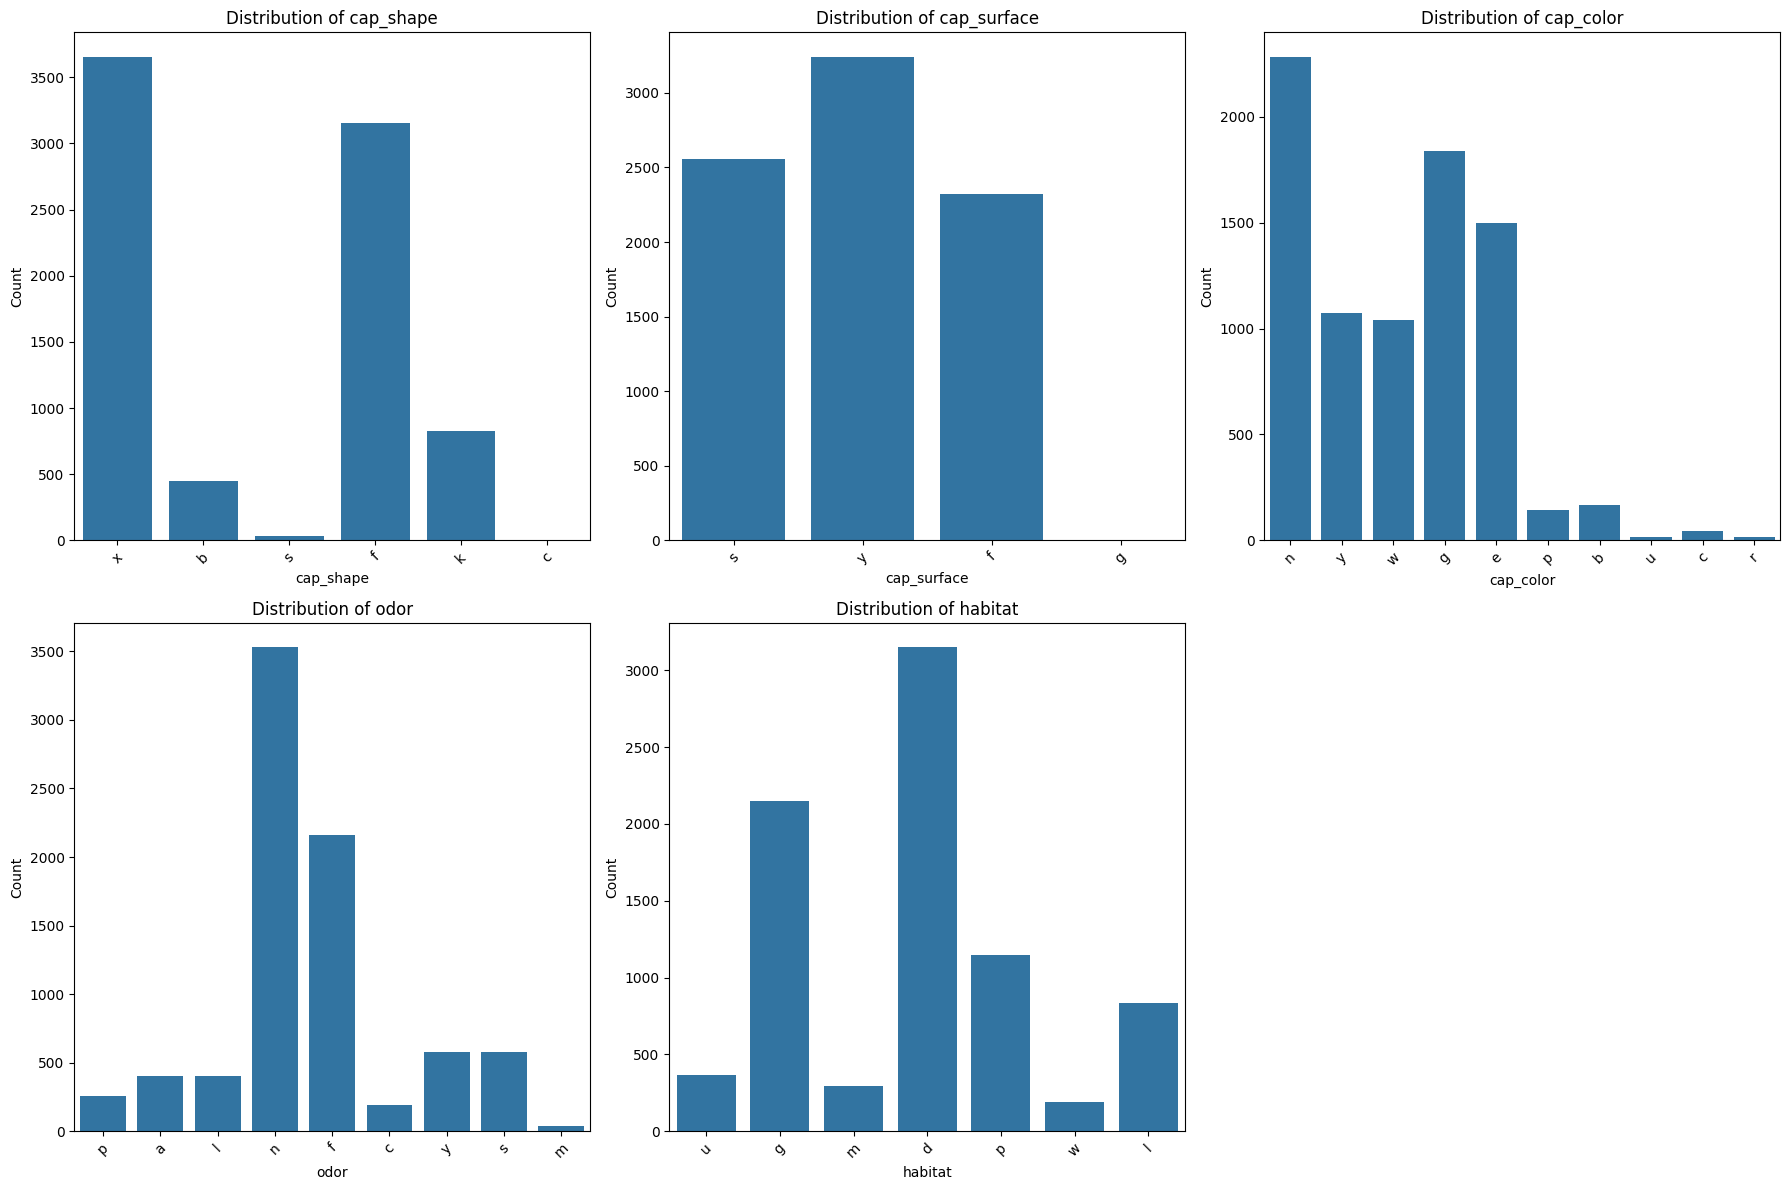

In [ ]:
# Visualize the distribution of key features
features_to_visualize = ["cap_shape", "cap_surface", "cap_color", "odor", "habitat"]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()
for i, feature in enumerate(features_to_visualize):
    sns.countplot(data=mushroom_data, x=feature, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

In [ ]:
# Encode categorical features
label_encoders = {}
for column in mushroom_data.columns:
    le = LabelEncoder()
    mushroom_data[column] = le.fit_transform(mushroom_data[column])
    label_encoders[column] = le

In [ ]:
# Split the dataset
X = mushroom_data.drop('class', axis=1)
y = mushroom_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Evaluate Random Forest with different n_estimators
n_estimators_values = [1, 50, 100, 150, 200, 250]
rf_results = {}
for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    rf_results[n] = accuracy

In [ ]:
# Evaluate Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

In [ ]:
# Show the results
print("Random Forest Accuracy for different n_estimators:")
for n, accuracy in rf_results.items():
    print(f"n_estimators={n}: Accuracy={accuracy:.2f}")

print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Random Forest Accuracy for different n_estimators:
n_estimators=1: Accuracy=1.00
n_estimators=50: Accuracy=1.00
n_estimators=100: Accuracy=1.00
n_estimators=150: Accuracy=1.00
n_estimators=200: Accuracy=1.00
n_estimators=250: Accuracy=1.00
Decision Tree Accuracy: 1.00


In [ ]:
# Detailed metrics for the best Random Forest model
best_n = max(rf_results, key=rf_results.get)
best_rf = RandomForestClassifier(n_estimators=best_n, random_state=42)
best_rf.fit(X_train, y_train)
y_pred_best_rf = best_rf.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred_best_rf)
prec = precision_score(y_test, y_pred_best_rf, average='macro')
rec = recall_score(y_test, y_pred_best_rf, average='macro')
f1 = f1_score(y_test, y_pred_best_rf, average='macro')

In [16]:
print(f"best Random Forest Model (n_estimators={best_n}) Performance:")
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {fD1:.2f}")

best Random Forest Model (n_estimators=1) Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


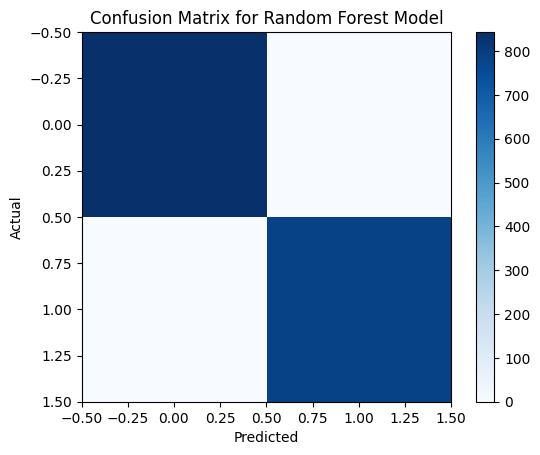

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
cm = confusion_matrix(y_test, y_pred_best_rf)
cm1=confusion_matrix(y_test, y_pred_dt)
plt.imshow(cm, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.colorbar()
plt.show()
print("Classification Report for Random Forest Model:")
print(classification_report(y_test, y_pred_best_rf))

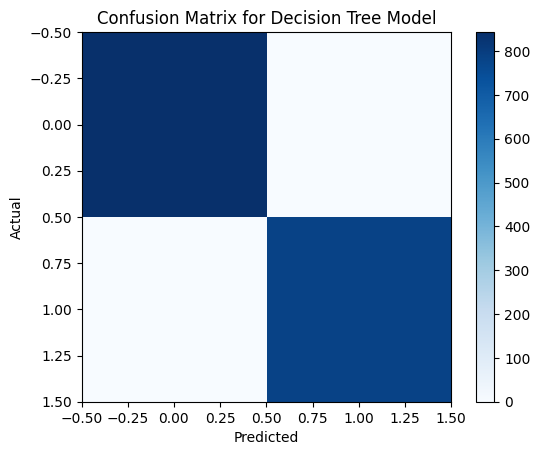

Classification Report for Decision Tree Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
cm1=confusion_matrix(y_test, y_pred_dt)
plt.imshow(cm1, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Model')
plt.colorbar()
plt.show()
print("Classification Report for Decision Tree Model:")
print(classification_report(y_test, y_pred_dt))

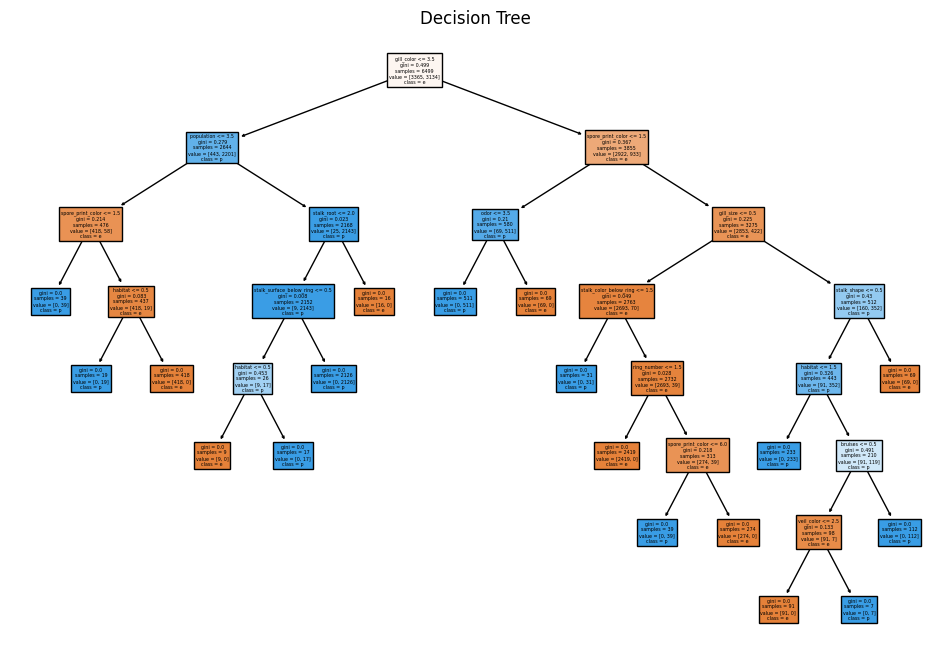

In [ ]:
# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=column_names[1:], class_names=label_encoders['class'].classes_, filled=True)
plt.title('Decision Tree')
plt.show()